In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.cluster import KMeans 
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_excel('Week2_challenge_data_source.xlsx')

In [4]:
data.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [3]:
print("Column Names:")
print("----------------")
for col in data.columns:
    print(col+" ("+str(data[col].dtype)+")")
print("----------------")

Column Names:
----------------
Bearer Id (object)
Start (datetime64[ns])
Start ms (float64)
End (datetime64[ns])
End ms (float64)
Dur. (ms) (float64)
IMSI (float64)
MSISDN/Number (float64)
IMEI (float64)
Last Location Name (object)
Avg RTT DL (ms) (float64)
Avg RTT UL (ms) (float64)
Avg Bearer TP DL (kbps) (float64)
Avg Bearer TP UL (kbps) (float64)
TCP DL Retrans. Vol (Bytes) (float64)
TCP UL Retrans. Vol (Bytes) (float64)
DL TP < 50 Kbps (%) (float64)
50 Kbps < DL TP < 250 Kbps (%) (float64)
250 Kbps < DL TP < 1 Mbps (%) (float64)
DL TP > 1 Mbps (%) (float64)
UL TP < 10 Kbps (%) (float64)
10 Kbps < UL TP < 50 Kbps (%) (float64)
50 Kbps < UL TP < 300 Kbps (%) (float64)
UL TP > 300 Kbps (%) (float64)
HTTP DL (Bytes) (float64)
HTTP UL (Bytes) (float64)
Activity Duration DL (ms) (float64)
Activity Duration UL (ms) (float64)
Dur. (ms).1 (float64)
Handset Manufacturer (object)
Handset Type (object)
Nb of sec with 125000B < Vol DL (float64)
Nb of sec with 1250B < Vol UL < 6250B (float64)
Nb

In [5]:
data.rename(columns={'Bearer Id':'Bearer_ID', 'Dur. (ms).1':'Duration', 'End ms':'End_ms',
                     'Start ms': 'Start_ms', 'Handset Manufacturer':'Manufacturer', 
                     'Handset Type': 'Handset_Type', 'MSISDN/Number':'MSISDN',
                     'Social Media DL (Bytes)':'Social_Media_DL', 'Social Media UL (Bytes)': 'Social_Media_UL',
                     'Google DL (Bytes)': 'Google_DL', 'Google UL (Bytes)': 'Google_UL',
                     'Email DL (Bytes)': 'Email_DL', 'Email UL (Bytes)':'Email_UL',
                    'Youtube DL (Bytes)': 'Youtube_DL', 'Youtube UL (Bytes)': 'Youtube_UL',
                    'Netflix DL (Bytes)': 'Netflix_DL', 'Netflix UL (Bytes)': 'Netflix_UL',
                   'Gaming DL (Bytes)':'Gaming_DL', 'Gaming UL (Bytes)': 'Gaming_UL',
                    'Gaming DL (Bytes)':'Gaming_DL', 'Gaming UL (Bytes)':'Gaming_UL',
                    'Other DL (Bytes)':'Other_DL', 'Other UL (Bytes)': 'Other_UL',
                     'Total UL (Bytes)':'Total_UL', 'Total DL (Bytes)': 'Total_DL'}, inplace=True)

In [6]:
data.head(2)

,Bearer_ID,Start,Start_ms,End,End_ms,Dur. (ms),IMSI,MSISDN,IMEI,Last Location Name,...,Youtube_DL,Youtube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL,Total_UL,Total_DL
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [7]:
bytes = 1000000
data['total_Social_media'] = (data['Social_Media_DL'] + data['Social_Media_UL'])/bytes
data['total_Google'] = (data['Google_DL'] + data['Google_UL'])/bytes
data['total_Email'] = (data['Email_DL'] + data['Email_UL'])/bytes
data['total_Youtube'] = (data['Youtube_DL'] + data['Youtube_UL'])/bytes
data['total_Netflix'] = (data['Netflix_DL'] + data['Netflix_UL'])/bytes
data['total_Gaming'] = (data['Gaming_DL'] + data['Gaming_UL'])/bytes
data['total_Other'] = (data['Other_DL'] + data['Other_UL'])/bytes
data['Total'] = (data['Total_DL'] + data['Total_UL'])/bytes

data.head()

,Bearer_ID,Start,Start_ms,End,End_ms,Dur. (ms),IMSI,MSISDN,IMEI,Last Location Name,...,Total_UL,Total_DL,total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,total_Other,Total
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,36749741.0,308879636.0,1.570185,2.905912,3.701304,18.355943,17.855187,292.426453,180.558843,345.629377
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,1.933278,4.414096,0.937385,39.359124,35.565545,609.920783,541.959383,707.185356
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1.726277,10.229119,3.363124,34.425237,23.751202,229.980251,414.908351,307.690973
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,0.657493,11.811761,2.070983,36.534765,15.092588,810.387875,761.837216,889.352748
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,0.912788,7.748843,2.110349,34.222253,17.539799,531.237049,564.619822,607.681403


In [9]:
return1 = data.groupby('MSISDN')[['Bearer_ID']].count()
df1 = pd.DataFrame(return1)
return1

,Bearer_ID
MSISDN,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2
...,...
3.379000e+10,1
3.379000e+10,1
3.197021e+12,1


In [8]:
return2 = data.groupby('MSISDN').agg({'Duration': np.sum, 'Total': np.sum})
df2 = pd.DataFrame(return2)
df2

,Duration,Total
MSISDN,,
3.360100e+10,116720140.0,878.690574
3.360100e+10,181230963.0,156.859643
3.360100e+10,134969374.0,595.966483
3.360101e+10,49878024.0,422.320698
3.360101e+10,37104453.0,1457.410944
...,...,...
3.379000e+10,8810688.0,714.641641
3.379000e+10,140988659.0,480.307335
3.197021e+12,877385325.0,232.123971


In [11]:
dataset= pd.merge(df1, df2, on='MSISDN')
dataset = dataset.dropna()
dataset

,Bearer_ID,Duration,Total
MSISDN,,,
3.360100e+10,1,116720140.0,878.690574
3.360100e+10,1,181230963.0,156.859643
3.360100e+10,1,134969374.0,595.966483
3.360101e+10,1,49878024.0,422.320698
3.360101e+10,2,37104453.0,1457.410944
...,...,...,...
3.379000e+10,1,8810688.0,714.641641
3.379000e+10,1,140988659.0,480.307335
3.197021e+12,1,877385325.0,232.123971


In [12]:
dataset.sort_values('Bearer_ID', ascending=False).head(10)

,Bearer_ID,Duration,Total
MSISDN,,,
3.362632e+10,18,8.791937e+09,7971.167261
3.362578e+10,17,1.855376e+10,8499.620722
3.361489e+10,17,9.966906e+09,8846.226494
3.365973e+10,16,4.035436e+09,7705.862783
3.376054e+10,15,9.279442e+09,8514.773963
3.367588e+10,15,4.865954e+09,7891.110608
3.366716e+10,13,8.744922e+09,5618.394054
3.362708e+10,12,4.703519e+09,5754.730859
3.360452e+10,12,5.207995e+09,5487.855293


In [13]:
dataset.sort_values('Duration', ascending=False).head(10)

,Bearer_ID,Duration,Total
MSISDN,,,
3.362578e+10,17,1.855376e+10,8499.620722
3.361489e+10,17,9.966906e+09,8846.226494
3.376054e+10,15,9.279442e+09,8514.773963
3.362632e+10,18,8.791937e+09,7971.167261
3.366716e+10,13,8.744922e+09,5618.394054
3.366284e+10,9,6.614274e+09,4000.097981
3.366469e+10,9,6.288736e+09,5682.007334
3.360313e+10,12,6.287767e+09,4976.195043
3.366746e+10,6,5.649885e+09,2600.521941


In [60]:
dataset.sort_values('Total', ascending=False).head(10)

,Bearer_ID,Duration,Total
MSISDN,,,
3.361489e+10,17,9.966906e+09,8846.226494
3.376054e+10,15,9.279442e+09,8514.773963
3.362578e+10,17,1.855376e+10,8499.620722
3.362632e+10,18,8.791937e+09,7971.167261
3.367588e+10,15,4.865954e+09,7891.110608
3.365973e+10,16,4.035436e+09,7705.862783
3.366646e+10,11,4.536764e+09,7308.500938
3.376041e+10,12,5.321674e+09,7132.370514
3.366471e+10,11,2.927790e+09,6872.018208


In [14]:
x = dataset[['Bearer_ID','Duration', 'Total']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
datamart = pd.DataFrame(x_scaled)
datamart['MSISDN'] = data['MSISDN']
datamart.rename(columns={0: 'Bearer_ID', 1: 'Duration', 2:'Total'}, inplace=True)

x

,Bearer_ID,Duration,Total
MSISDN,,,
3.360100e+10,1,116720140.0,878.690574
3.360100e+10,1,181230963.0,156.859643
3.360100e+10,1,134969374.0,595.966483
3.360101e+10,1,49878024.0,422.320698
3.360101e+10,2,37104453.0,1457.410944
...,...,...,...
3.379000e+10,1,8810688.0,714.641641
3.379000e+10,1,140988659.0,480.307335
3.197021e+12,1,877385325.0,232.123971


In [30]:
X = x.iloc[:, [2,1]].values

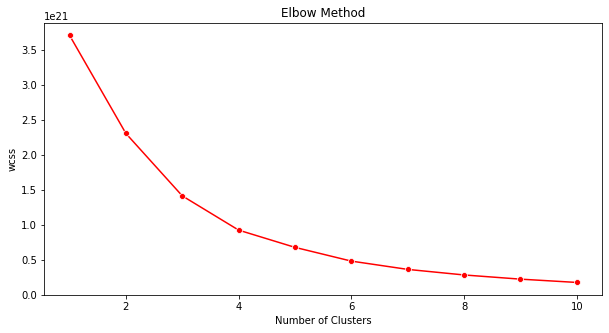

In [31]:
from sklearn.cluster import KMeans

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [32]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
Y_kmeans = kmeans.fit_predict(X)

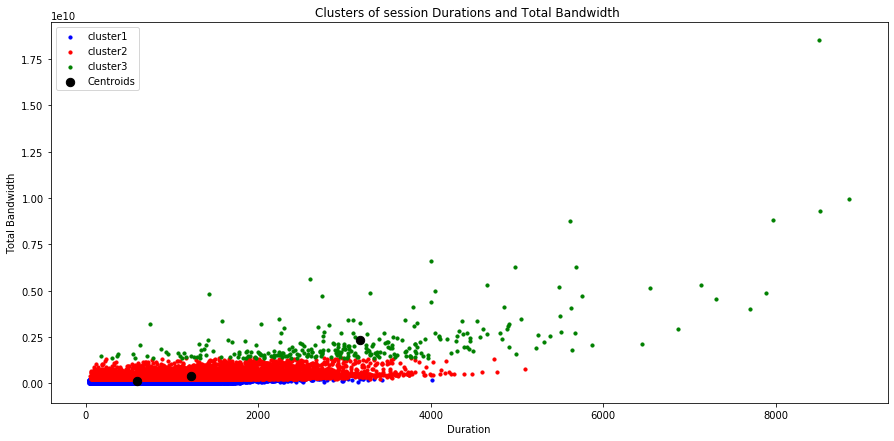

In [33]:
# Visualising the clusters
plt.figure(figsize=(15,7))
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=10, c='blue', label= 'cluster1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=10, c='red', label= 'cluster2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=10, c='green', label= 'cluster3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of session Durations and Total Bandwidth ')
plt.xlabel('Duration')
plt.ylabel('Total Bandwidth')
plt.legend()
plt.show()

In [11]:
table = pd.pivot_table(data, index=['MSISDN'], aggfunc={'total_Social_media': np.sum, 'total_Google':np.sum,
                                                                    'total_Youtube':np.sum, 'total_Email':np.sum,
                                                                    'total_Netflix':np.sum, 'total_Gaming':np.sum, 'total_Other':np.sum})
table

,total_Email,total_Gaming,total_Google,total_Netflix,total_Other,total_Social_media,total_Youtube
MSISDN,,,,,,,
3.360100e+10,1.331362,812.458661,4.389005,27.180981,386.570872,2.232135,21.624548
3.360100e+10,3.307781,119.750078,5.334863,11.221763,281.710071,2.660565,12.432223
3.360100e+10,3.205380,538.827713,3.443126,19.353900,501.693672,3.195623,21.333570
3.360101e+10,2.284670,391.126127,9.678493,1.942092,35.279702,0.280294,6.977321
3.360101e+10,3.305469,1314.797820,18.499616,49.201724,804.804484,2.912542,41.533002
...,...,...,...,...,...,...,...
3.379000e+10,1.006915,660.361359,7.531269,14.902538,295.282817,0.300183,26.647843
3.379000e+10,2.514097,437.003292,5.429705,8.531060,211.115113,0.498569,19.851572
3.197021e+12,1.520771,178.048738,10.438660,26.592300,470.526473,0.715224,11.959905


In [12]:
data_mart = pd.DataFrame(table)
data_mart

,total_Email,total_Gaming,total_Google,total_Netflix,total_Other,total_Social_media,total_Youtube
MSISDN,,,,,,,
3.360100e+10,1.331362,812.458661,4.389005,27.180981,386.570872,2.232135,21.624548
3.360100e+10,3.307781,119.750078,5.334863,11.221763,281.710071,2.660565,12.432223
3.360100e+10,3.205380,538.827713,3.443126,19.353900,501.693672,3.195623,21.333570
3.360101e+10,2.284670,391.126127,9.678493,1.942092,35.279702,0.280294,6.977321
3.360101e+10,3.305469,1314.797820,18.499616,49.201724,804.804484,2.912542,41.533002
...,...,...,...,...,...,...,...
3.379000e+10,1.006915,660.361359,7.531269,14.902538,295.282817,0.300183,26.647843
3.379000e+10,2.514097,437.003292,5.429705,8.531060,211.115113,0.498569,19.851572
3.197021e+12,1.520771,178.048738,10.438660,26.592300,470.526473,0.715224,11.959905


In [13]:
table = pd.pivot_table(data, index=['MSISDN'], aggfunc={'total_Email':np.sum})
top_email = pd.DataFrame(table) 
top_email.head(10)

,total_Email
MSISDN,
3.360100e+10,1.331362
3.360100e+10,3.307781
3.360100e+10,3.205380
3.360101e+10,2.284670
3.360101e+10,3.305469
3.360101e+10,7.848596
3.360101e+10,1.358959
3.360101e+10,2.215563
3.360101e+10,4.599825


In [120]:
table = pd.pivot_table(data, index=['MSISDN'], aggfunc={'total_Gaming':np.sum})
top_Gaming = pd.DataFrame(table).dropna() 
top_Gaming.head(10)

,total_Gaming
MSISDN,
3.360100e+10,812.458661
3.360100e+10,119.750078
3.360100e+10,538.827713
3.360101e+10,391.126127
3.360101e+10,1314.797820
3.360101e+10,511.635787
3.360101e+10,548.461057
3.360101e+10,282.364397
3.360101e+10,833.087952


In [121]:
table = pd.pivot_table(data, index=['MSISDN'], aggfunc={'total_Google':np.sum})
top_Google = pd.DataFrame(table).dropna() 
top_Google.head(10)

,total_Google
MSISDN,
3.360100e+10,4.389005
3.360100e+10,5.334863
3.360100e+10,3.443126
3.360101e+10,9.678493
3.360101e+10,18.499616
3.360101e+10,15.263134
3.360101e+10,10.196403
3.360101e+10,12.023614
3.360101e+10,14.134211


In [122]:
table = pd.pivot_table(data, index=['MSISDN'], aggfunc={'total_Netflix':np.sum})
top = pd.DataFrame(table).dropna() 
top.head(10)

,total_Netflix
MSISDN,
3.360100e+10,27.180981
3.360100e+10,11.221763
3.360100e+10,19.353900
3.360101e+10,1.942092
3.360101e+10,49.201724
3.360101e+10,30.315501
3.360101e+10,45.812397
3.360101e+10,15.292840
3.360101e+10,54.216117


In [123]:
table = pd.pivot_table(data, index=['MSISDN'], aggfunc={'total_Youtube':np.sum})
top = pd.DataFrame(table).dropna() 
top.head(10)

,total_Youtube
MSISDN,
3.360100e+10,21.624548
3.360100e+10,12.432223
3.360100e+10,21.333570
3.360101e+10,6.977321
3.360101e+10,41.533002
3.360101e+10,34.347122
3.360101e+10,26.431335
3.360101e+10,18.892740
3.360101e+10,63.443802


In [124]:
table = pd.pivot_table(data, index=['MSISDN'], aggfunc={'total_Social_media':np.sum})
top = pd.DataFrame(table).dropna() 
top.head(10)

,total_Social_media
MSISDN,
3.360100e+10,2.232135
3.360100e+10,2.660565
3.360100e+10,3.195623
3.360101e+10,0.280294
3.360101e+10,2.912542
3.360101e+10,3.792912
3.360101e+10,2.769627
3.360101e+10,1.782692
3.360101e+10,5.288685


In [125]:
table = pd.pivot_table(data, index=['MSISDN'], aggfunc={'total_Other':np.sum})
top = pd.DataFrame(table).dropna() 
top.head(10)

,total_Other
MSISDN,
3.360100e+10,386.570872
3.360100e+10,281.710071
3.360100e+10,501.693672
3.360101e+10,35.279702
3.360101e+10,804.804484
3.360101e+10,492.372777
3.360101e+10,224.888713
3.360101e+10,178.201537
3.360101e+10,1041.882992


In [14]:
#Identifying top used application
data_mart.describe()

,total_Email,total_Gaming,total_Google,total_Netflix,total_Other,total_Social_media,total_Youtube
count,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000
mean,3.148796,599.769011,10.882434,31.538332,598.508764,2.547967,31.558399
std,2.222400,449.150462,7.544861,21.289557,448.922110,1.908038,21.294918
min,0.018176,0.306358,0.040330,0.184569,0.149045,0.001563,0.078903
25%,1.674481,288.063112,5.942636,18.555973,285.559911,1.211281,18.631088
50%,2.799824,542.349207,9.586153,26.718889,539.832343,2.303756,26.800376
75%,3.847198,777.304138,13.214740,37.976957,775.397531,3.307509,37.927976
max,42.418782,7749.432234,152.191852,399.519079,8167.877776,43.374779,452.958769


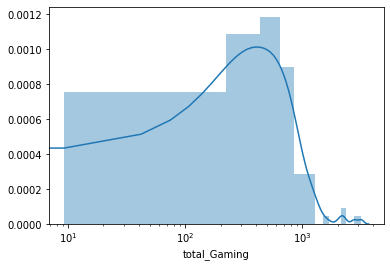

In [18]:
#Distribution of Total Gaming Bandwidth used
table = data.pivot_table(index='MSISDN', aggfunc={'total_Gaming':np.sum, 'total_Youtube':np.sum, 'total_Other':np.sum})
fig, ax = plt.subplots()
sample = table.sample(100, random_state=1)
sns.distplot(sample['total_Gaming'])
ax.set_xscale('log')



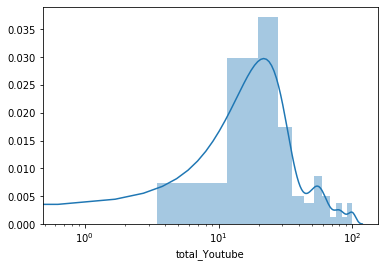

In [19]:
fig, ax = plt.subplots()
sample = table.sample(100, random_state=1)
sns.distplot(sample['total_Youtube'])
ax.set_xscale('log')

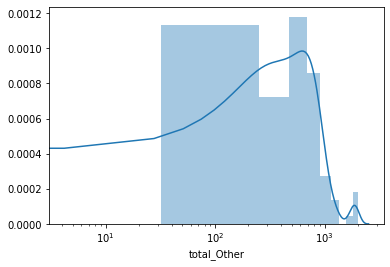

In [20]:
fig, ax = plt.subplots()
sample = table.sample(100, random_state=1)
sns.distplot(sample['total_Other'])
ax.set_xscale('log')